<h2> Predicting Song Skipping on Spotify Using NLP

<h2> Importing Required Libraries

In [1]:
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz
import sklearn
from sklearn.preprocessing import MinMaxScaler

<h2> Importing The Dataset

In [3]:
pd.set_option("display.max_columns",None)
df1=pd.read_csv("log_mini.csv")
df1.head() # First rows of dataset

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
df1.tail() #Last rows of the dataset

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167879,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,20,20,t_77977dd6-597e-4425-8f8f-4efb32ecfba6,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [5]:
df1.shape # shape of the dataset

(167880, 21)

In [6]:
df2=pd.read_csv("tf_mini.csv")
df2.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [7]:
df2.shape

(50704, 30)

<h2> Merging The Dataset

In [8]:
df3 = pd.merge(df1, df2, left_on='track_id_clean', right_on='track_id')
df3=df3.drop(["track_id_clean"],axis='columns')
df3.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,False,False,True,False,0,0,1,1,0,0,False,17,2018-07-15,True,editorial_playlist,fwdbtn,endplay,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,False,False,False,True,0,0,1,1,0,0,False,21,2018-07-14,True,user_collection,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,False,False,False,True,0,1,0,0,0,0,False,18,2018-07-15,True,editorial_playlist,fwdbtn,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,False,False,True,False,0,0,1,1,0,0,True,19,2018-07-14,False,editorial_playlist,trackdone,fwdbtn,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [9]:
df3.shape

(167880, 50)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   skip_1                           167880 non-null  bool   
 4   skip_2                           167880 non-null  bool   
 5   skip_3                           167880 non-null  bool   
 6   not_skipped                      167880 non-null  bool   
 7   context_switch                   167880 non-null  int64  
 8   no_pause_before_play             167880 non-null  int64  
 9   short_pause_before_play          167880 non-null  int64  
 10  long_pause_before_play           167880 non-null  int64  
 11  hist_user_behavior_n_seekfwd     167880 non-null  int64  
 12  hi

<h2> Checking Null Values in Dataset

In [11]:
df3.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
track_id                           0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

In [12]:
df3.describe(include='all')

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880,167880.000000,167880.000000,167880,167880,167880,167880,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880,167880.000000,167880,167880,167880,167880,167880,167880,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
unique,10000,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,18,2,6,9,7,50704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0_0710f409-cf7f-44bc-b159-2da3b13e0fa9,NaN,NaN,False,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,2018-07-15,True,user_collection,fwdbtn,fwdbtn,t_bacf06d3-9185-4183-84ea-ff0db51475ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,major,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,97118,86824,108850,111996,NaN,NaN,NaN,NaN,NaN,NaN,116050,NaN,119639,136053,67430,79912,81389,1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.325911,17.651823,NaN,NaN,NaN,NaN,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,NaN,14.193084,NaN,NaN,NaN,NaN,NaN,NaN,215.893484,2013.368614,99.744583,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,NaN,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,NaN,5.457638,3.422025,NaN,NaN,NaN,NaN,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,NaN,5.996243,NaN,NaN,NaN,NaN,NaN,NaN,60.223626,9.740043,0.892779,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,NaN,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,NaN,5.000000,15.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,183.503403,2015.000000,99.913831,0.030579,0.434064,0.451872,0.562350,7.224558,0.513711,0.989104,3.701751e-09,1.000000,0.099943,-8.232000,0.452991,NaN,0.205129,0.044635,97.004997,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,NaN,9.000000,20.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,212.027023,2017.000000,99.988785,0.115362,0.550788,0.594088,0.687427,8.965730,0.630788,1.013991,5.221813e-07,5.000000,0.125049,-6.506000,0.639286,NaN,0.305746,0.08

In [13]:
df3.nunique()

session_id                         10000
session_position                      20
session_length                        11
skip_1                                 2
skip_2                                 2
skip_3                                 2
not_skipped                            2
context_switch                         2
no_pause_before_play                   2
short_pause_before_play                2
long_pause_before_play                 2
hist_user_behavior_n_seekfwd          25
hist_user_behavior_n_seekback         30
hist_user_behavior_is_shuffle          2
hour_of_day                           24
date                                  18
premium                                2
context_type                           6
hist_user_behavior_reason_start        9
hist_user_behavior_reason_end          7
track_id                           50704
duration                           33549
release_year                          69
us_popularity_estimate             50704
acousticness    

<h2> Boolean Features to Number Conversion

In [14]:
df3['mode'] = df3['mode'].replace({
    'major': 1,
    'minor': 0
})
df3['skip_1'] = df3['skip_1'].replace({
    True: 1,
    False: 0
})
df3['skip_2'] = df3['skip_2'].replace({
    True: 1,
    False: 0
})
df3['skip_3'] = df3['skip_3'].replace({
    True: 1,
    False: 0
})
df3['not_skipped'] = df3['not_skipped'].replace({
    True: 1,
    False: 0
})
df3['hist_user_behavior_is_shuffle'] = df3['hist_user_behavior_is_shuffle'].replace({
    True: 1,
    False: 0
})
df3['premium'] = df3['premium'].replace({
    True: 1,
    False: 0
})

df3.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,1,0,0,0,0,0,0,1,16,2018-07-15,1,editorial_playlist,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,0,0,1,0,0,0,1,1,0,0,0,17,2018-07-15,1,editorial_playlist,fwdbtn,endplay,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,0,0,0,1,0,0,1,1,0,0,0,21,2018-07-14,1,user_collection,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,0,0,0,1,0,1,0,0,0,0,0,18,2018-07-15,1,editorial_playlist,fwdbtn,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,0,0,1,0,0,0,1,1,0,0,1,19,2018-07-14,0,editorial_playlist,trackdone,fwdbtn,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   skip_1                           167880 non-null  int64  
 4   skip_2                           167880 non-null  int64  
 5   skip_3                           167880 non-null  int64  
 6   not_skipped                      167880 non-null  int64  
 7   context_switch                   167880 non-null  int64  
 8   no_pause_before_play             167880 non-null  int64  
 9   short_pause_before_play          167880 non-null  int64  
 10  long_pause_before_play           167880 non-null  int64  
 11  hist_user_behavior_n_seekfwd     167880 non-null  int64  
 12  hi

<h2> Categorical Features Encoding

In [16]:
df4 = pd.get_dummies(df3, columns = ['context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'])
df4.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,1,0,0,0,0,0,0,1,16,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0_00079a23-1600-486a-91bd-5208be0c745a,7,12,0,0,1,0,0,0,1,1,0,0,0,17,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6,20,0,0,0,1,0,0,1,1,0,0,0,21,2018-07-14,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9,13,0,0,0,1,0,1,0,0,0,0,0,18,2018-07-15,1,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7,12,0,0,1,0,0,0,1,1,0,0,1,19,2018-07-14,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [17]:
df4.shape

(167880, 69)

In [18]:
df4.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'track_id', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7', 'context_type_catalog', 'context_type_charts',
       'context_type_editorial_playlist', 'context_type_personal

In [19]:
df4.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.421503,0.517179,0.648380,0.332881,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,0.308732,14.193084,0.810418,215.893484,2013.368614,99.744583,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,0.613909,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859,0.227919,0.014540,0.212431,0.017727,0.125727,0.401656,0.011568,0.077639,0.104325,0.000119,0.476007,0.000923,0.000810,0.328062,0.000548,0.078205,0.000048,0.088295,0.484805,0.003354,0.001590,0.343704
std,5.457638,3.422025,0.493801,0.499706,0.477478,0.471246,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,0.461972,5.996243,0.391971,60.223626,9.740043,0.892779,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,0.486853,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958,0.419491,0.119703,0.409030,0.131958,0.331542,0.490235,0.106930,0.267603,0.305682,0.010914,0.499425,0.030372,0.028451,0.469509,0.023403,0.268494,0.006903,0.283725,0.499771,0.057813,0.039848,0.474945
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647,0.000000,0

<h2> Outliers Removal

In [20]:
max_threshold = df4['hist_user_behavior_n_seekfwd'].quantile(0.999)
max_threshold

3.0

In [21]:
max_threshold_seekback = df4['hist_user_behavior_n_seekback'].quantile(0.999)
max_threshold_seekback

4.0

In [22]:
min_thresold_loudness = df4['loudness'].quantile(0.001)
min_thresold_loudness

-31.202999114990234

In [23]:
max_thresold_loudness = df4['loudness'].quantile(0.9998)
max_thresold_loudness

0.1749999970197677

In [24]:
df4 = df4[df4['hist_user_behavior_n_seekfwd'] < max_threshold]
df4 = df4[df4['hist_user_behavior_n_seekback'] < max_threshold_seekback]
df4 =  df4[(df4['loudness'] < 0) & (df4['loudness'] > min_thresold_loudness)]

In [25]:
df3.shape

(167880, 50)

In [26]:
df4.shape

(167128, 69)

In [27]:
df4.describe()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,1.671280e+05,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000
mean,9.329460,17.652410,0.422772,0.517735,0.648431,0.332829,0.040622,0.768369,0.146343,0.172377,0.028637,0.033669,0.309206,14.198872,0.810648,215.936241,2013.367018,99.745097,0.217498,0.548220,0.580543,0.669431,9.102023,0.626993,1.008180,3.100681e-02,5.204915,0.189763,-7.023079,0.596964,0.613745,0.347817,0.142138,122.695125,3.949195,0.459741,-0.517197,0.269558,0.206911,-0.016530,-0.139659,0.048219,-0.283374,0.059636,0.227030,0.014558,0.212592,0.017675,0.125909,0.402237,0.011518,0.077240,0.103699,0.000120,0.476575,0.000903,0.000802,0.328592,0.000550,0.078299,0.000048,0.087879,0.485131,0.003327,0.001586,0.343731
std,5.456103,3.421973,0.494001,0.499687,0.477462,0.471227,0.197412,0.421876,0.353451,0.377709,0.184498,0.208043,0.462168,5.991602,0.391789,60.132911,9.740451,0.892882,0.245484,0.158245,0.178661,0.158992,2.537397,0.180895,0.038448,1.405705e-01,3.681345,0.150745,3.023311,0.207384,0.486892,0.188191,0.132949,29.791158,0.334730,0.229064,0.384376,0.192314,0.164471,0.266426,0.313858,0.115764,0.301205,0.261951,0.418913,0.119774,0.409142,0.131768,0.331748,0.490351,0.106703,0.266973,0.304871,0.010939,0.499452,0.030045,0.028304,0.469703,0.023456,0.268643,0.006918,0.283119,0.499780,0.057582,0.039788,0.474954
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.213329,1950.000000,90.018900,0.000001,0.000000,0.000000,0.000000,2.541023,0.000020,0.221220,4.851275e-16,0.000000,0.011562,-31.172001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647,0.000000,0

<h2> Normalizing The Data

In [28]:
df5 = df4.copy()
df5.drop(['session_id','track_id','date','skip_1','skip_3', 'not_skipped'],axis = 'columns', inplace = True)
sc = MinMaxScaler()
scaling_col = df5.columns
for i in scaling_col:
    df5[i] = sc.fit_transform(df5[[i]])

In [29]:
df5.shape

(167128, 63)

In [30]:
df5.describe()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
count,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,1.671280e+05,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.00000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000,167128.000000
mean,0.438393,0.765241,0.517735,0.040622,0.768369,0.146343,0.172377,0.014318,0.011223,0.309206,0.617342,0.810648,0.105672,0.931868,0.974462,0.218415,0.553523,0.596904,0.679659,0.220155,0.627063,0.892251,3.102547e-02,0.473174,0.180970,0.775346,0.596964,0.613745,0.361425,0.147844,0.560828,0.789839,0.459745,0.294699,0.713642,0.706540,0.420784,0.46229,0.748960,0.265990,0.486537,0.227030,0.014558,0.212592,0.017675,0.125909,0.402237,0.011518,0.077240,0.103699,0.000120,0.476575,0.000903,0.000802,0.328592,0.000550,0.078299,0.000048,0.087879,0.485131,0.003327,0.001586,0.343731
std,0.287163,0.342197,0.499687,0.197412,0.421876,0.353451,0.377709,0.092249,0.069348,0.462168,0.260504,0.391789,0.034214,0.143242,0.089457,0.246521,0.159776,0.183696,0.161421,0.085143,0.180921,0.043592,1.406551e-01,0.334668,0.153088,0.097069,0.207384,0.486892,0.195553,0.138286,0.136173,0.066946,0.229066,0.187048,0.101368,0.121156,0.141442,0.16299,0.087518,0.176851,0.123105,0.418913,0.119774,0.409142,0.131768,0.331748,0.490351,0.106703,0.266973,0.304871,0.010939,0.499452,0.030045,0.028304,0.469703,0.023456,0.268643,0.006918,0.283119,0.499780,0.057582,0.039788,0.474954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [31]:
df5.corr()

,session_position,session_length,skip_2,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,context_type_catalog,context_type_charts,context_type_editorial_playlist,context_type_personalized_playlist,context_type_radio,context_type_user_collection,hist_user_behavior_reason_start_appload,hist_user_behavior_reason_start_backbtn,hist_user_behavior_reason_start_clickrow,hist_user_behavior_reason_start_endplay,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
session_position,1.000000,0.313568,0.039718,-0.020814,0.193901,0.026770,0.022922,-0.068111,-0.054510,0.012198,-0.003878,0.023832,-0.004953,0.000393,-0.004644,-0.001002,-0.001063,-0.000259,0.000437,-0.002586,-0.000491,-0.001642,0.003582,0.003471,0.002255,-0.001873,-0.002823,-0.012958,0.000055,0.008254,0.002237,-0.003045,0.007524,-0.008689,0.001622,0.003080,0.007946,-0.002927,-0.008140,-0.002126,0.003877,-0.030366,0.008244,-0.000219,-0.007517,0.029808,0.005965,-0.123817,0.002358,-0.102712,-0.012190,0.094005,-0.030505,-0.013644,-0.003441,-0.000108,-0.016922,-0.005649,-0.056722,0.042351,0.024812,-0.017786,-0.002617
session_length,0.313568,1.000000,0.078381,-0.012455,0.053641,-0.007523,-0.020315,-0.011955,-0.025350,0.031899,-0.012748,0.075795,-0.010033,0.010241,0.004140,-0.003387,0.011927,0.014652,0.013297,0.011919,-0.007741,0.012763,-0.003507,0.004209,-0.000681,-0.002384,0.000589,-0.008588,-0.002792,0.014491,0.006542,0.000348,-0.003353,-0.028272,0.002619,0.009054,0.022862,-0.009637,-0.022228,-0.016367,0.007172,-0.047147,0.020842,-0.002125,-0.019974,0.034103,0.019255,-0.035804,-0.012084,-0.018594,-0.001606,0.068678,-0.005384,-0.002312,-0.045612,0.003502,-0.011224,-0.015472,-0.010882,0.078227,-0.043628,-0.009751,-0.063149
skip_2,0.039718,0.078381,1.000000,-0.073874,0.104695,-0.033532,-0.073437,0.021426,-0.062064,0.048684,0.009359,-0.015947,0.019282,-0.007570,-0.004201,-0.018253,0.000782,0.005793,0.004239,0.007086,0.006214,-0.001772,-0.012194,0.001841,0.004110,0.005697,-0.005990,-0.011562,-0.005585,0.019448,0.005147,0.007337,-0.000876,-0.025676,0.010939,0.011222,0.013727,-0.015639,-0.016352,-0.017321,0.010235,-0.066185,0.009333,-0.009281,-0.017938,0.027335,0.048334,-0.012192,0.098611,-0.094338,-0.002578,0.472836,-0.001665,-0.003967,-0.494359,-0.001343,0.223579,0.006678,0.037559,0.568930,-0.026589,-0.004875,-0.743983
context_switch,-0.020814,-0.012455,-0.073874,1.000000,0.004421,0.009302,0.027342,0.025231,0.007200,-0.045526,-0.001407,0.023867,0.004665,-0.008298,-0.005507,-0.001408,0.001486,0.000216,-0.004305,0.002372,0.003232,-0.005715,0.007797,-0.006769,0.010848,-0.000680,-0.000832,0.006305,-0.000454,0.000521,-0.001199,-0.000913,0.001217,0.007936,-0.010384,-0.011035,0.002117,0.005983,-0.006262,0.006425,0.001526,0.116972,-0.012104,-0.028616,-0.010350,0.035741,-0.094497,0.035735,-0.059306,0.567972,-0.002251,-0.193251,0.021050,0.007021,-0.139242,-0.000953,-0.055800,0.002957,0.180109,-0.111015,0.002324,0.022271,0.038826
no_pause_before_play,0.193901,0.053641,0.104695,0.004421,1.000000,-0.754103,-0.831208,-0.093971,-0.103870,-0.018290,-0.013645,0.009731,-0.026680,0.008199,

In [32]:
df5.isnull().sum()

session_position                           0
session_length                             0
skip_2                                     0
context_switch                             0
no_pause_before_play                       0
                                          ..
hist_user_behavior_reason_end_endplay      0
hist_user_behavior_reason_end_fwdbtn       0
hist_user_behavior_reason_end_logout       0
hist_user_behavior_reason_end_remote       0
hist_user_behavior_reason_end_trackdone    0
Length: 63, dtype: int64

In [58]:
#df5.to_csv("finaldataset.csv.gz", index = False, compression = "gzip")

<h2> Correlation Heatmap

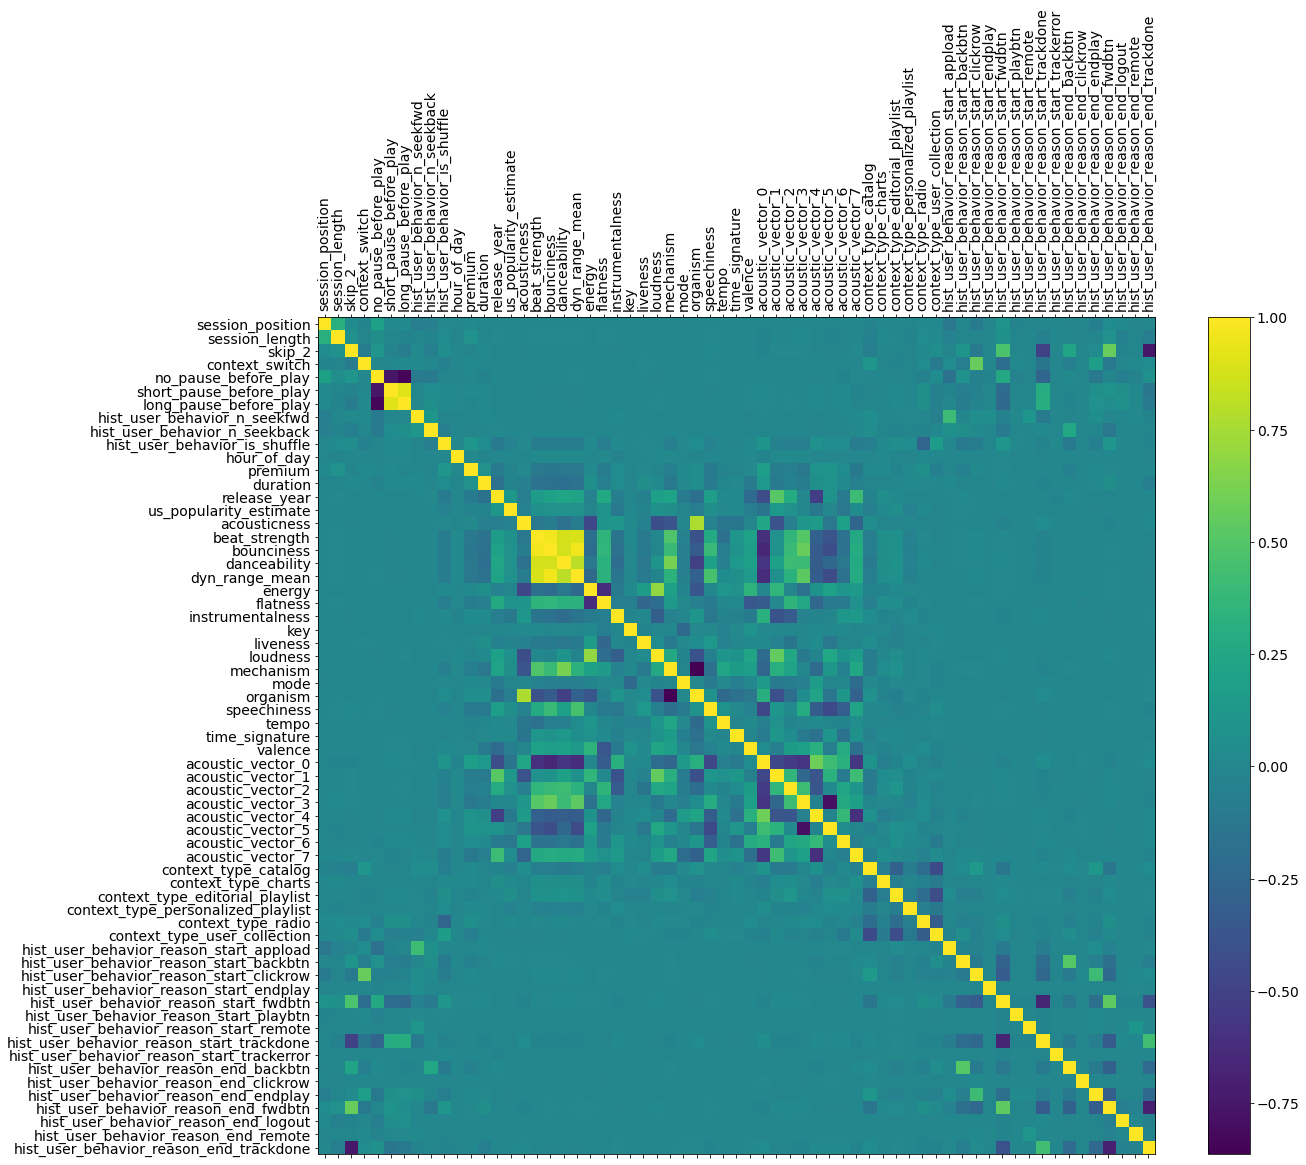

In [34]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df5.corr(), fignum=f.number)
plt.xticks(range(df5.select_dtypes(['number']).shape[1]), df5.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df5.select_dtypes(['number']).shape[1]), df5.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

<h2> Song Features Histogram

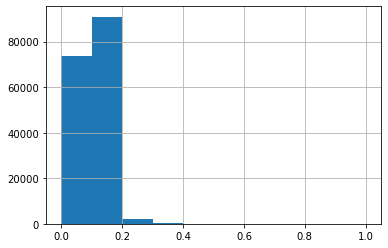

In [35]:
df5.duration.hist();

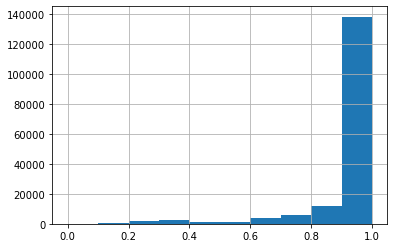

In [36]:
df5.release_year.hist();

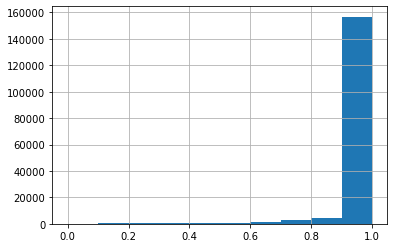

In [37]:
df5.us_popularity_estimate.hist();

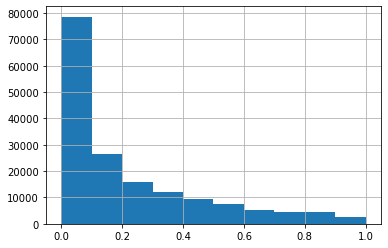

In [38]:
df5.acousticness.hist();

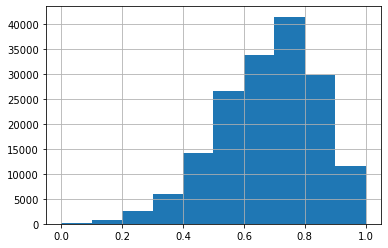

In [39]:
df5.danceability.hist();

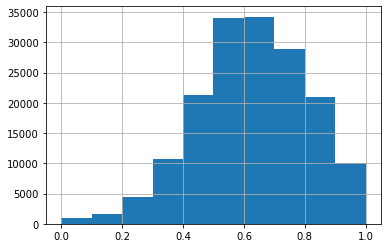

In [40]:
df5.energy.hist();

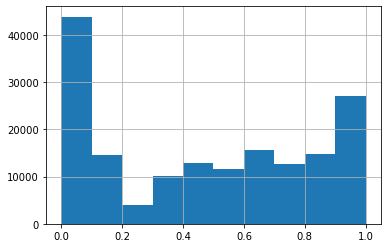

In [41]:
df5.key.hist();

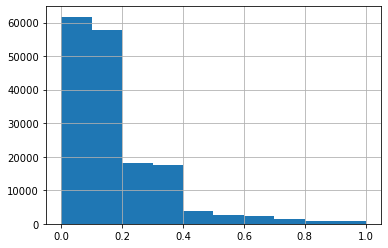

In [42]:
df5.liveness.hist();

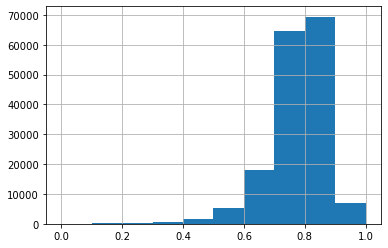

In [43]:
df5.loudness.hist();

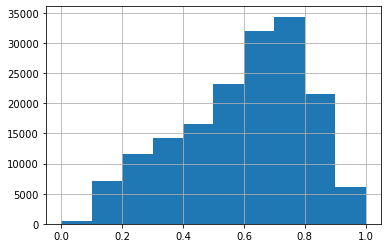

In [44]:
df5.mechanism.hist();

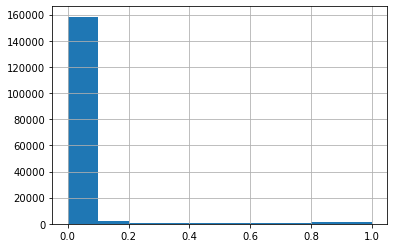

In [45]:
df5.instrumentalness.hist();

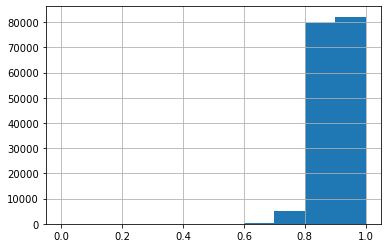

In [46]:
df5.flatness.hist();

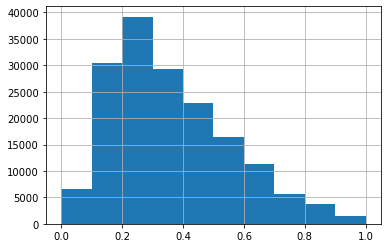

In [47]:
df5.organism.hist();

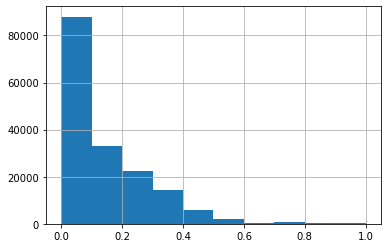

In [48]:
df5.speechiness.hist();

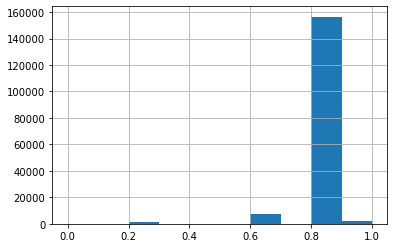

In [49]:
df5.time_signature.hist();

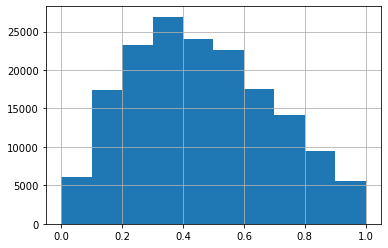

In [50]:
df5.valence.hist();

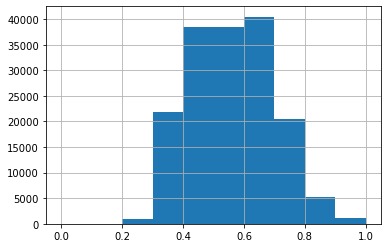

In [51]:
df5.tempo.hist();

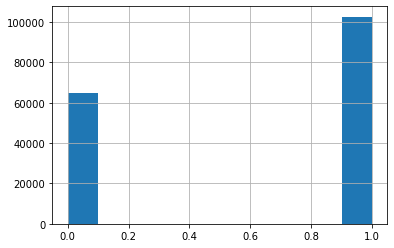

In [52]:
df5['mode'].hist();

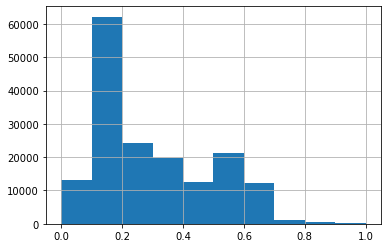

In [53]:
df5.acoustic_vector_0.hist();

<h2> Principle Component Analysis (PCA)

In [54]:
df6 = df5.copy()
df6.shape

(167128, 63)

In [55]:
df6_x = df6.drop(['skip_2'],axis = "columns")
df6_y = df6.skip_2
from sklearn.decomposition import PCA
pca = PCA(n_components=35, random_state= 50)
pca.fit(df6_x)

PCA(n_components=35, random_state=50)

In [56]:
x_pca = pca.transform(df6_x)
df6_x.shape,x_pca.shape

((167128, 62), (167128, 35))

<BarContainer object of 35 artists>

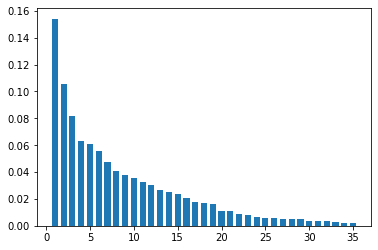

In [57]:
variance= pca.explained_variance_ratio_
plt.bar(x= range(1, len(variance)+1), height=variance, width=0.7)